# All Imports  

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt


# Define the image directories for tumor, normal, cyst, and stone

In [ ]:

image_directory = 'datasets/'
normal_images = os.listdir(image_directory + 'Normal/')
tumor_images = os.listdir(image_directory + 'Tumor/')
cyst_images = os.listdir(image_directory + 'Cyst/')
stone_images = os.listdir(image_directory + 'Stone/')

dataset = []
label = []

INPUT_SIZE = 64

# Load normal images

In [ ]:

for i, image_name in enumerate(normal_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'Normal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

# Load tumor images

In [ ]:

for i, image_name in enumerate(tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'Tumor/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

# Load cyst images

In [ ]:

for i, image_name in enumerate(cyst_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'Cyst/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(2)

# Load stone images

In [ ]:

for i, image_name in enumerate(stone_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'Stone/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(3)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

y_train = to_categorical(y_train, num_classes=4)  # 4 classes for normal, tumor, cyst, and stone
y_test = to_categorical(y_test, num_classes=4)

# Model Building

In [ ]:



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(4))  # Output layer with 4 neurons for normal, tumor, cyst, and stone
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






In [ ]:
model.fit(x_train, y_train,
          batch_size=32,
          verbose=1, epochs=5,
        #   validation_data=(x_test, y_test)
          shuffle=True)

model.save('trainedModel2.h5')

In [ ]:
model.summary()

In [ ]:
loss,acc= model.evaluate(x_test, y_test)
print(acc)

# CODE FOR TESTING THE MODEL 

1/1 [==============================] - 0s 77ms/step


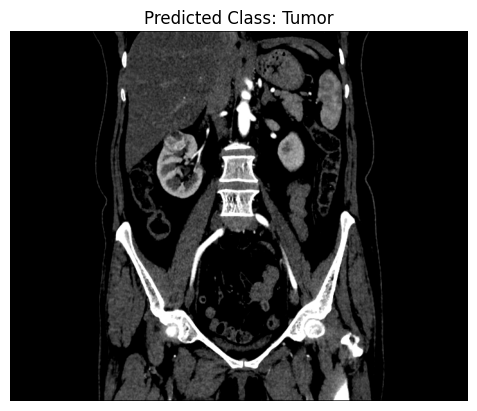

The model predicts that the image belongs to class: Tumor


In [24]:

# Load the trained model
model = load_model('trainedModel.h5')

# Define the input size expected by the model
EXPECTED_INPUT_SIZE = (64, 64)

# Load and preprocess a test image
test_image_path = 'testing\Tumor- (2270).jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, EXPECTED_INPUT_SIZE)
test_image = np.reshape(test_image, [1, *EXPECTED_INPUT_SIZE, 3])  # Reshape to (1, 64, 64, 3)
test_image = test_image / 255.0  # Normalize pixel values between 0 and 1

# Make predictions
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Map the predicted class to the corresponding label
class_labels = {0: 'Normal', 1: 'Tumor', 2: 'Cyst', 3: 'Stone'}
predicted_label = class_labels[predicted_class]

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')  # Turn off axis labels
plt.show()

# Print the result
print(f'The model predicts that the image belongs to class: {predicted_label}')

